# <center>Literacy rates in Sub-saharan Africa</center>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# Load the data
df = pd.read_csv('data/Literacy rates.csv')

# Show
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,17.61%
1,Central and Southern Asia,Afghanistan,2011,15+,male,45.42%
2,Central and Southern Asia,Afghanistan,2011,15+,total,31.74%
3,Central and Southern Asia,Afghanistan,2011,15-24,female,32.11%
4,Central and Southern Asia,Afghanistan,2011,15-24,male,61.88%


### Set up view
---

In [3]:
# Convert the "Literacy rate" column to number
df['Literacy rate'] = df['Literacy rate'].str.replace('%', '').astype('float')

# Crate a view with the latest literacy rate for each country in the sub-saharan region broken down by gender
mask = (((df['Region'] == 'Sub-Saharan Africa') & 
         (df['Age'] == '15+') &
         (df['Year'] == df.groupby('Country')['Year'].transform(lambda x: max(x)))),
        ['Country', 'Gender', 'Literacy rate'])

view = df\
        .loc[mask]\
        .pivot_table(values='Literacy rate',index='Country', columns='Gender', aggfunc='max')\
        .sort_values('total', ascending=False)\
        .reset_index()
view['diff'] = view['male'] - view['female']

view.head(10)

Gender,Country,female,male,total,diff
0,Seychelles,96.35,95.41,95.87,-0.94
1,Equatorial Guinea,92.40,97.29,95.00,4.89
2,Sao Tome and Principe,89.52,96.16,92.82,6.64
3,Namibia,91.44,91.63,91.53,0.19
4,Mauritius,89.37,93.36,91.33,3.99
5,Zimbabwe,88.28,89.19,88.69,0.91
6,Swaziland,88.54,88.29,88.42,-0.25
7,Botswana,88.70,86.74,87.70,-1.96
8,South Africa,86.46,87.68,87.05,1.22
9,Cabo Verde,82.04,91.69,86.79,9.65


### Create plot
---

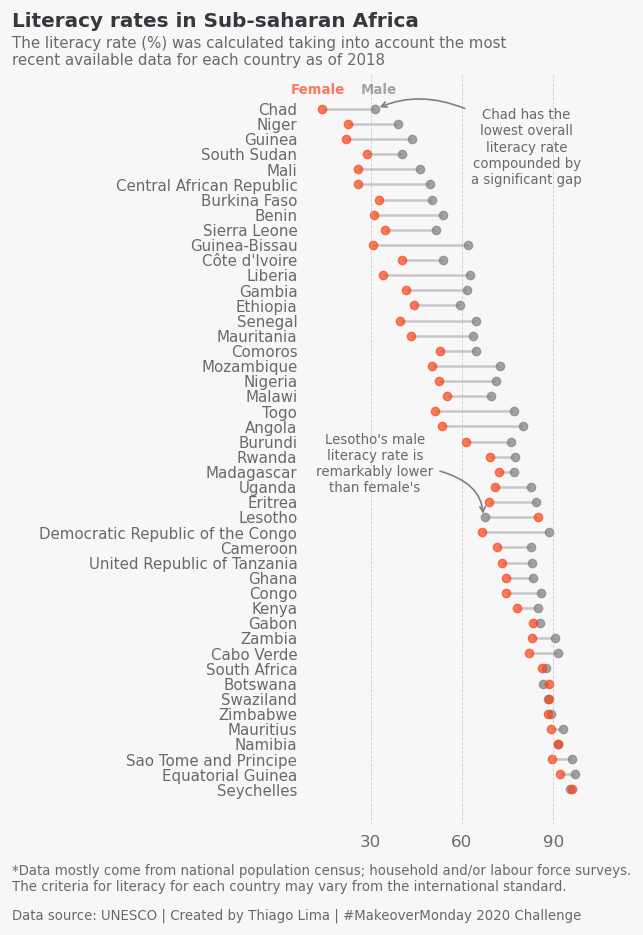

In [4]:
# Basic defaults
rcParams['font.family'] = 'sans-serif'
rcParams['text.color'] = '#696969'
rcParams['axes.labelcolor'] = '#696969'
rcParams['ytick.color'] = '#696969'
rcParams['xtick.color'] = '#696969'

# Plot values
fig, ax = plt.subplots(figsize=(3, 8), dpi=120, facecolor = '#f7f7f7')

for idx, p1, p2 in zip(view.index, view['male'], view['female']):
    ax.hlines(y=idx, xmin=p1, xmax=p2, colors='#c7c7c7', linewidth=1.5, zorder=0)
    ax.scatter(x=p1, y=idx, s = 25, c='#808080', edgecolor='#808080', linewidth=0.8, alpha=0.7)
    ax.scatter(x=p2, y=idx, s = 25, c='#F9461C', edgecolor='#F9461C', linewidth=0.8, alpha=0.7)
    
ax.set_yticks(ticks = view.index)
ax.set_yticklabels(labels= view['Country'], fontdict={'size' : 9})
ax.xaxis.grid(True, linewidth=0.5, linestyle='--', alpha=0.6)
ax.set_xticks([30, 60, 90])

# Title, subtitle and legends
fig.text(x =-0.7, y= 0.93, s = 'Literacy rates in Sub-saharan Africa', color='#37373d', size=12, weight='bold' )
fig.text(x =-0.7, y= 0.89, s = 'The literacy rate (%) was calculated taking into account the most\n'
         + 'recent available data for each country as of 2018', size=9)
fig.text(x =0.32, y= 0.86, s = 'Male', size=8, alpha=.7, color= '#808080', weight='semibold', ha='center')
fig.text(x =0.15, y= 0.86, s = 'Female', size=8, alpha=.7, color= '#F9461C', weight='semibold', ha='center')

# Comments
ax.annotate(s="Chad has the\nlowest overall\nliteracy rate\ncompounded by\na significant gap",
            xy=(32, 45), xycoords='data',
            ha='center', size=8, color='#696969',
            xytext=(90, -45), textcoords='offset points',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=-40, angleB=25"})

ax.annotate(s="Lesotho's male\nliteracy rate is\nremarkably lower\nthan female's",
            xy=(67, 18), xycoords='data',
            ha='center', size=8, color='#696969',
            xytext=(-65, 15), textcoords='offset points',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-90"})

# Footnote
fig.subplots_adjust(bottom=0.1)
fig.text(s='*Data mostly come from national population census; household and/or labour force surveys.\n' + 
           'The criteria for literacy for each country may vary from the international standard.',
         x=-0.7, y=0.03, size=8)
fig.text(s='Data source: UNESCO | Created by Thiago Lima | #MakeoverMonday 2020 Challenge', ha='left', x=-0.7, y=0, size=8)

# Formatting
ax.patch.set_alpha(0)

# Remove borders
for spine in ax.spines:
     ax.spines[spine].set_visible(False)

# Remove tick marks
ax.tick_params(left=False, bottom=False) # Remove tick marks

fig.savefig('literacy_rates_plot.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')